In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
import pandas as pd

1-load data \
2-what are in this data sets ? 

In [2]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

1-shape of data 

2-name of features 

3-shape of targets  

4-name of targets

In [3]:
print(iris.data.shape) 
print(iris.feature_names) 
print(iris.target.shape )
print(iris.target_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150,)
['setosa' 'versicolor' 'virginica']


how much of each class (target) is in datasets

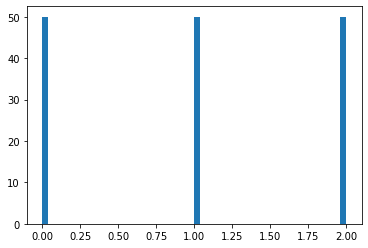

In [4]:
np.unique(iris.target,return_counts=True)

plt.hist(iris.target,bins=50)
plt.show()

count Nan in data

In [5]:
data=[iris.data]
type(data)
np.isnan(data).sum()

0

show histogram of each classes versus each feature

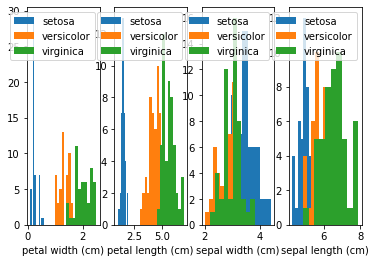

In [6]:
plt.subplot(1,4,1)
plt.rcParams['figure.figsize'] = (20, 8)
x=3
for label  in   range(len(iris.target_names)):
    plt.hist(iris.data[iris.target==label ,x],label=iris.target_names[label] ) 
    plt.xlabel(iris.feature_names[x])
    plt.legend()

plt.subplot(1,4,2)
x=2
for label  in   range(len(iris.target_names)):
    plt.hist(iris.data[iris.target==label ,x],label=iris.target_names[label] )
    plt.xlabel(iris.feature_names[x])
    plt.legend()

plt.subplot(1,4,3)
x=1
for label  in   range(len(iris.target_names)):
    plt.hist(iris.data[iris.target==label ,x],label=iris.target_names[label] )
    plt.xlabel(iris.feature_names[x])
    plt.legend()
   

plt.subplot(1,4,4)
x=0
for label  in   range(len(iris.target_names)):
    plt.hist(iris.data[iris.target==label ,x],label=iris.target_names[label] )
    plt.xlabel(iris.feature_names[x])
    plt.legend()
  

compare Pairwise features scatering 

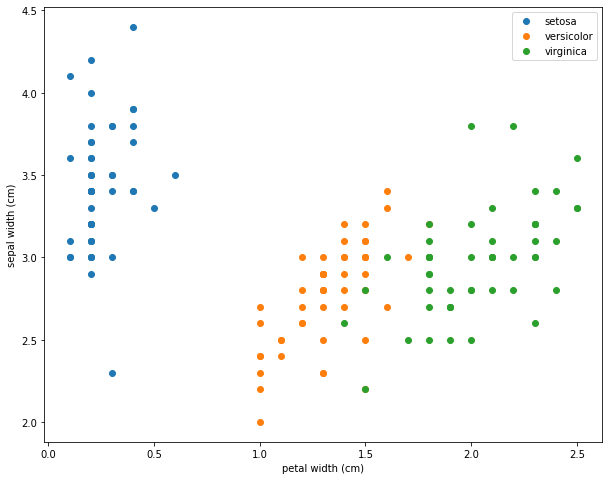

In [7]:
x=3
y=1
plt.rcParams['figure.figsize'] = (10, 8)
for label  in   range(len(iris.target_names)):
    plt.scatter(iris.data[iris.target==label ,x],iris.data[iris.target==label ,y],label=iris.target_names[label] ) 
    plt.xlabel(iris.feature_names[x])
    plt.ylabel(iris.feature_names[y])
    plt.legend()

using scatter matrix to have good view of comparing 

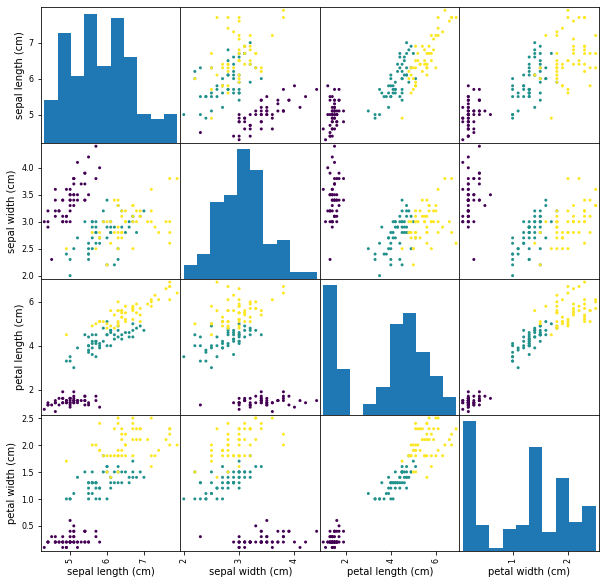

In [8]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df,alpha=1,c=iris.target,figsize=(10,10))
plt.show()

make train and test sampels

In [9]:
from sklearn.model_selection import train_test_split

In [21]:
x,y=iris.data ,iris.target

x_train , x_test , y_train ,y_test =train_test_split(x,y,test_size=0.3,stratify=y)

In [24]:
#are clases spilit with equal raito

labels, counts = np.unique(y_train, return_counts=True)
print(counts / float(len(y_train)))

[0.33333333 0.33333333 0.33333333]


make model

In [26]:
import sklearn.linear_model._logistic as ml

In [27]:
cl=ml.LogisticRegression()
cl.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_predict=cl.predict(x_test)

compute  accuracy of model

In [29]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_predict)

0.9777777777777777

find wich sample was peredict wrong

In [57]:
incorrect_idx = np.where(y_predict != y_test)[0]
print(incorrect_idx)

[29]


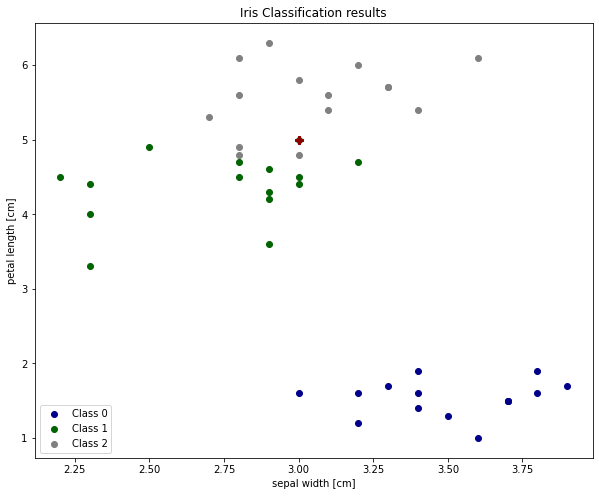

In [72]:
colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
   
    idx = np.where(y_test == n)[0]
    plt.scatter(x_test[idx, 1], x_test[idx, 2], color=color, label="Class %s" % str(n))

plt.scatter(x_test[incorrect_idx, 1], x_test[incorrect_idx, 2], color="darkred",marker="P",s=50)

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()